# Importing the Libraries

We are importing these magic lines as a start for our notebook. This will ensure that we won't have to reload our notebook for each change in the module and that we have our plots in the notebook. 

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

We are importing all the modules from fastai and fastai vision as we are making a quick and dirty prototype for classifying various crop diseases. 

In [2]:
from fastai import *
from fastai.vision import *

import os


# Loading the Image Dataset

Since, our image dataset is located in plantvillage-dataset/color, we load it as our path. We are putting the train files name as '.' to let the ImageDataBunch know that we are in the train folder. We then normalize the dataset with imagenet_stats. 

In [3]:
path = Path('../input/plantvillage-dataset/color')

In [4]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Cherry_(including_sour)___healthy',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___healthy',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Grape___healthy',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___Late_blight',
  'Potato___healthy',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___Leaf_scorch',
  'Strawberry___healthy',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  '

We have about 38 different classes. Below we have shown a couple of classes available. 

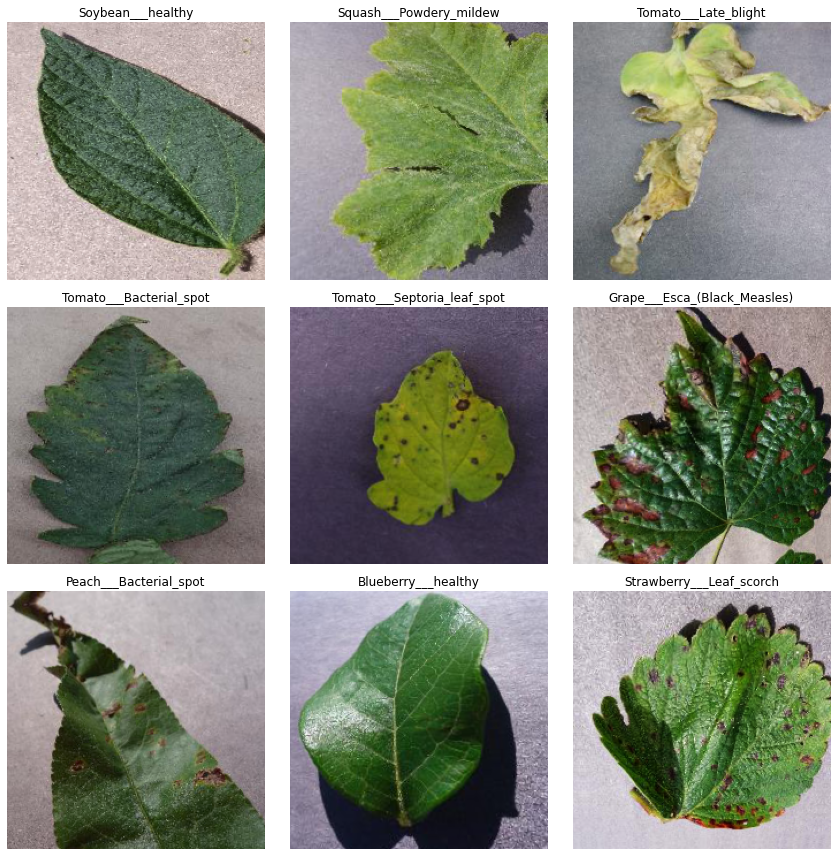

In [6]:
data.show_batch(rows = 3, size = (3, 7))

# Loading the Model

We are using resnet34. This model has pretrained weights from the imagenet dataset. Becuase of this, the model has to be downloaded into our platform, before we can use it. 

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


By doing fit_one_cycle, we will be training the last couple of layers of our model for 4 epochs to fit it to our image dataset. 

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.327631,0.147357,0.047049,06:53
1,0.171143,0.074968,0.025136,06:27
2,0.099370,0.042794,0.015376,06:10
3,0.071292,0.032553,0.010312,06:07


Now, since my model has a 99% accuracy, I will be saving it as I am happy with its predictions. 

In [10]:
learn.model_dir='/kaggle/working/'
learn.save('model-1')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

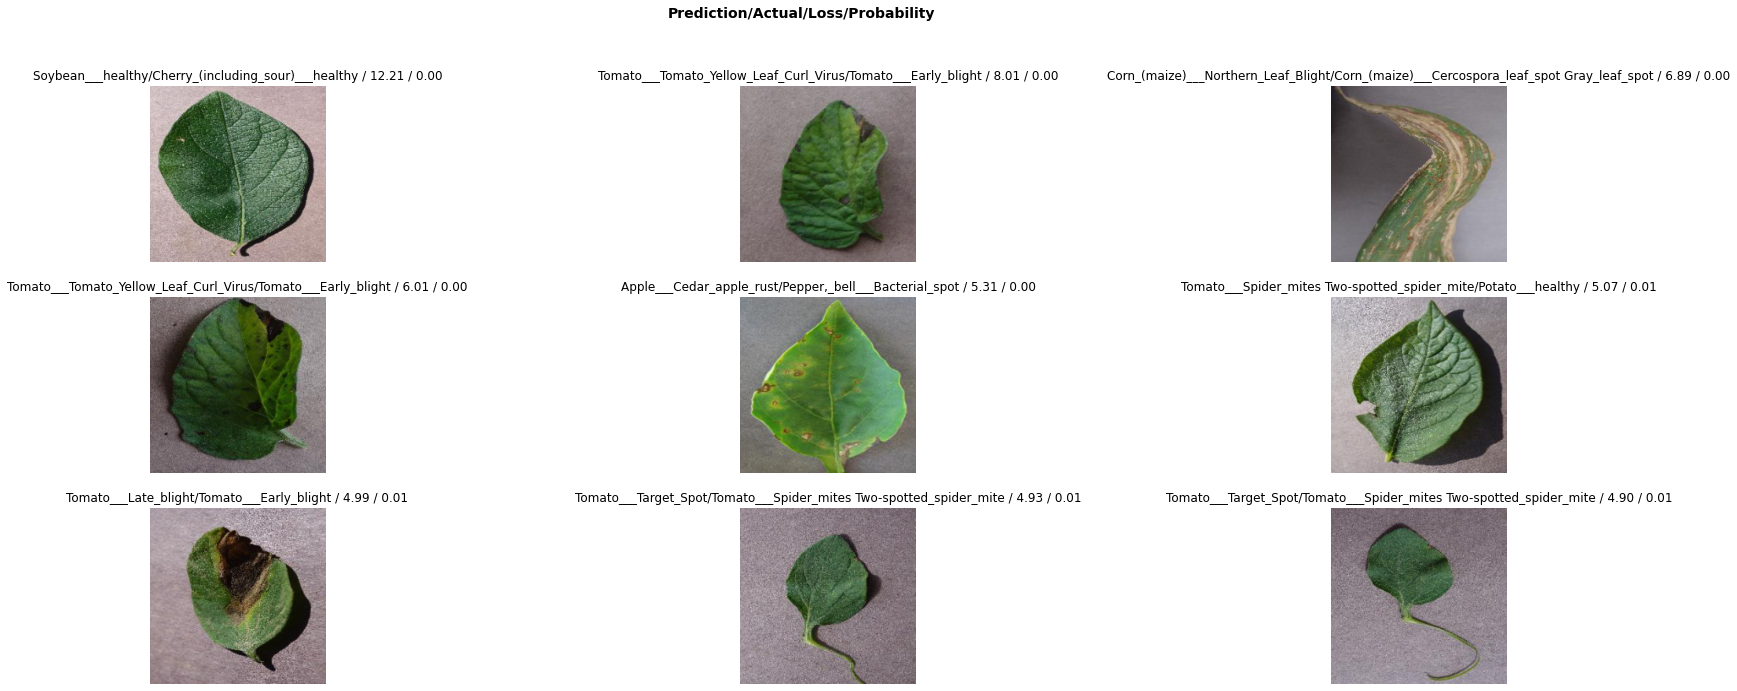

In [12]:
interp.plot_top_losses(9, figsize = (30,11))

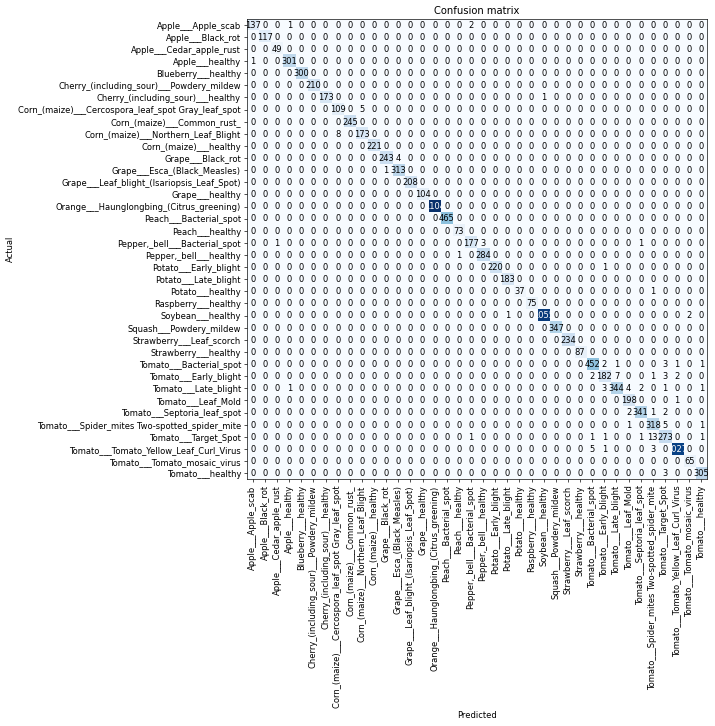

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
interp.most_confused(min_val=2)

[('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 13),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  8),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 7),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  5),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 5),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 5),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 4),
 ('Tomato___Late_blight', 'Tomato___Leaf_Mold', 4),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 3),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 3),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 3),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 3),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  3),
 ('Tomato___healthy', 'Tomato___Target_Spot', 3),
 ('Apple___

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.052848,0.020358,0.006813,06:16


In [17]:
learn.save('model-2')

In [18]:
PATH = Path('../input/testing-dataset')

In [19]:
data2 = ImageDataBunch.single_from_classes(
    PATH, 
    data.classes, 
    ds_tfms = get_transforms(),
    size = 224
).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data2, models.resnet34)
learn.model_dir='/kaggle/working/'
learn.load('model-2');

In [ ]:
images = [os.path.join('../input/testing-dataset',img) for img in os.listdir('../input/testing-dataset')]

In [ ]:
for img in images:
    pred_class,pred_idx,outputs = learn.predict(open_image(img))
    print(re.findall(r'[^/]+.jpg', img), pred_class)